# DMML Assignment 3

### Ankan Kar (MCS202303), Sayan Bose (MCS202312)

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import time as t
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.datasets import fashion_mnist

2024-04-21 07:11:26.533336: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-21 07:11:26.533681: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-21 07:11:26.715838: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Fashin MNIST

In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
fashion_mnist = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Split the data into train and test sets
fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist # Split the data into train and test sets

X_train = X_train.astype('float32') # uint8 -> float32
X_test = X_test.astype('float32') # uint8 -> float32

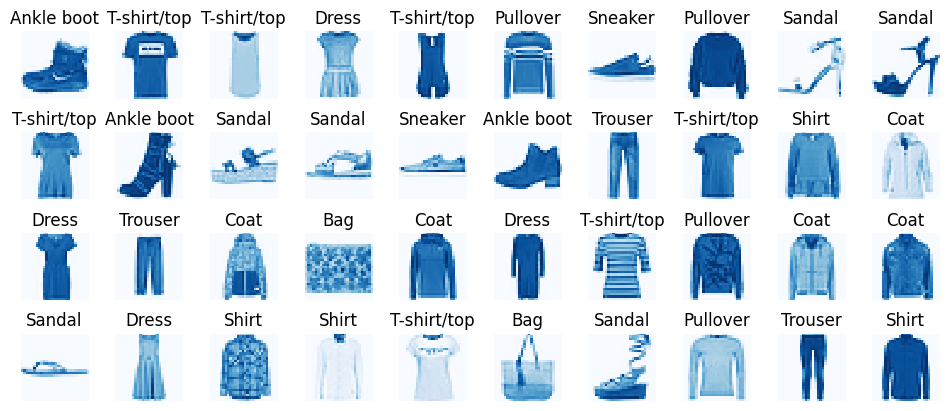

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # Define the class names

n_rows = 4 # Define the number of rows
n_cols = 10 # Define the number of columns
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2)) # Set the figure size
# Plot the images
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="Blues", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [5]:
# Display the shapes of the train and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# Reshape the train and test sets
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)

In [7]:
X_train_flat.shape, X_test_flat.shape

((60000, 784), (10000, 784))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
### Setting the list of values number of cluster (k) will take
value_k = [i for i in range(50,610,50)]

#### Using KMeans

In [10]:
acc = []

In [11]:
# for labels of logistic regression later used
y_logreg = []

In [12]:
# loop over the number of clusters
for k in value_k:
    print("k = ",k)
    kmeans = KMeans(k, random_state=42, n_init = 3) # Initialize the KMeans model
    dist = kmeans.fit_transform(X_train_flat) # Fit the model to the training data and transform the data
    print("dist: ", dist)
    print("dist.shape: ", dist.shape)
    
    
    # Initialize an empty list to store indices
    index_list = []

    # Iterate over each centroid
    for j in range(dist.shape[1]):
        m = np.inf
        index = -1
        for i in range(X_train.shape[0]):
            if dist[i][j]<m:
                index = i
                m = dist[i][j]
        index_list.append(index)

    print(index_list,len(index_list))
    
    
    # Initialize an empty list to store predicted labels
    predicted_labels = []

    for i in range(X_test_flat.shape[0]):
        m = np.inf
        index = -1
        for j in range(k):
            l = np.linalg.norm(X_train_flat[index_list[j]] - X_test_flat[i])
            if(l<m):
                index = index_list[j]
                m = l

        predicted_labels.append(y_train[index])
        
              
    # Calculate accuracy
    accuracy = accuracy_score(predicted_labels, y_test)
    print("Accuracy:", accuracy)
    acc.append(accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(predicted_labels, y_test))
          
          
    ## storing the predicted list on train data for logistic regression later

    # Initialize an empty list to store indices
    index_list = []

    # Iterate over each centroid
    for j in range(dist.shape[1]):
        m = np.inf
        index = -1
        for i in range(X_train_flat.shape[0]):
            if dist[i][j]<m:
                index = i
                m = dist[i][j]
        index_list.append(index)

    print("index list for centroids: ", index_list,len(index_list))

    # Initialize an empty list to store predicted labels
    predicted_labels = []

    for i in range(X_train_flat.shape[0]):
        m = np.inf
        index = -1
        for j in range(k):
            l = np.linalg.norm(X_train_flat[index_list[j]] - X_train_flat[i])
            if(l<m):
                index = index_list[j]
                m = l

        predicted_labels.append(y_train[index])

    y_logreg.append(predicted_labels)

k =  50
dist:  [[3632.718  2651.6487 2149.5706 ... 1527.02   2925.301  2998.6553]
 [3014.2903 2376.3428 3587.5183 ... 3501.8477 2546.576  3561.1802]
 [1692.7504 1966.1682 2561.523  ... 2776.856  3589.4473 1743.2313]
 ...
 [2226.9897 2673.736  3496.908  ... 3554.0017 3303.303  3393.9963]
 [2229.4163 1620.8896 2377.6343 ... 2615.3184 3334.8445 1483.0789]
 [2976.6611 2472.729  2095.0967 ... 2653.3994 4105.9185 1696.4557]]
dist.shape:  (60000, 50)
[37236, 54479, 45316, 2102, 25410, 25878, 20374, 59933, 51925, 46959, 41646, 39060, 14624, 35537, 34410, 47751, 54158, 33901, 39514, 48122, 1138, 15050, 2165, 55755, 4374, 17641, 15344, 5186, 34915, 24490, 35306, 24250, 16945, 19319, 7170, 43796, 11050, 44345, 9065, 25327, 9026, 8010, 36620, 16924, 58828, 40041, 39583, 8816, 9076, 41161] 50
Accuracy: 0.6243
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1192
           1       0.86      0.91      0.89       946
      

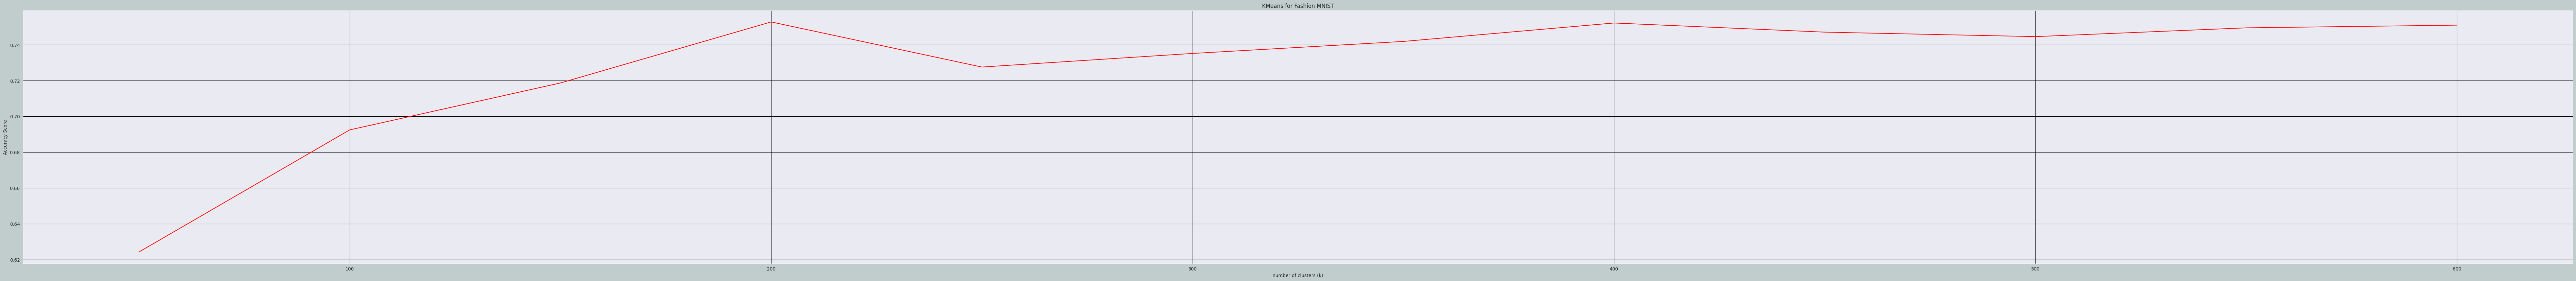

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("KMeans for Fashion MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

#### Using MiniBatchKMeans

In [14]:
acc = []

In [15]:
# loop over the number of clusters
for k in value_k:
    print("When k = ",k)
    kmeans = MiniBatchKMeans(k, batch_size = 1000, random_state=42) # Initialize the MiniBatchKMeans model
    dist = kmeans.fit_transform(X_train_flat) # Fit the model to the training data and transform the data
    print("dist: ", dist)
    print("dist.shape: ", dist.shape)
    
    
    # Initialize an empty list to store indices
    index_list = []

    # Iterate over each centroid
    for j in range(dist.shape[1]):
        m = np.inf
        index = -1
        for i in range(X_train.shape[0]):
            if dist[i][j]<m:
                index = i
                m = dist[i][j]
        index_list.append(index)

    print("index list for centroids: ", index_list,len(index_list))
    
    
    # Initialize an empty list to store predicted labels
    predicted_labels = []

    for i in range(X_test_flat.shape[0]):
        m = np.inf
        index = -1
        for j in range(k):
            l = np.linalg.norm(X_train_flat[index_list[j]] - X_test_flat[i])
            if(l<m):
                index = index_list[j]
                m = l

        predicted_labels.append(y_train[index])
        
              
    # Calculate accuracy
    accuracy = accuracy_score(predicted_labels, y_test)
    acc.append(accuracy)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(predicted_labels, y_test))

When k =  50


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[2941.0603 3125.7725 3168.7532 ... 2750.3665 2436.9229 2947.951 ]
 [3639.6973 2804.9614 2416.3733 ... 2322.241  3189.4778 3594.0369]
 [1849.0096 3146.0417 1168.7766 ... 2553.21   3147.736  1764.5345]
 ...
 [3364.265  2959.7979 1823.8438 ... 2700.9807 3420.1553 3412.2717]
 [1630.749  3060.7278 1542.938  ... 2351.9844 2964.266  1496.6688]
 [1084.9563 3707.4011 2436.8572 ... 3155.1204 3335.9502 1668.3232]]
dist.shape:  (60000, 50)
index list for centroids:  [34476, 9651, 36620, 58397, 35306, 38408, 20576, 10774, 2052, 54943, 33070, 40041, 813, 48787, 59770, 56001, 38343, 28675, 19639, 38585, 46667, 43812, 54158, 7605, 54266, 2064, 11050, 35363, 20374, 54719, 49992, 3677, 48749, 12481, 15344, 43341, 4574, 3045, 34488, 30284, 55925, 46377, 41646, 22351, 15798, 16924, 8818, 8736, 9026, 8958] 50
Accuracy: 0.6161
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.57      0.65      1351
           1       0.87      0.97      0.92

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[2848.1572 3166.4268 3222.4336 ... 1779.2753 2548.2666 3487.4849]
 [3665.5146 1737.0199 2615.942  ... 3379.7026 3422.2673 2983.8464]
 [1986.8864 1665.7781 3436.9724 ... 2747.8796 3108.889  1054.3114]
 ...
 [3419.7446 2244.653  3201.2192 ... 3301.636  3494.0767 2333.3782]
 [1790.0437 1478.8103 3282.8613 ... 2599.4414 2767.3523 1550.8622]
 [1138.0532 2691.9036 4064.1755 ... 2746.927  2915.9973 2298.7705]]
dist.shape:  (60000, 100)
index list for centroids:  [53857, 59933, 18084, 17673, 34488, 32902, 16822, 30821, 43370, 48122, 20242, 53949, 5548, 19319, 50099, 36677, 31258, 2815, 157, 55435, 48787, 35724, 7454, 21417, 7450, 3045, 19690, 13948, 8764, 17339, 40736, 3618, 7803, 54232, 47751, 6445, 32431, 1297, 1821, 53496, 38362, 33214, 52609, 35306, 6248, 27724, 28675, 7828, 53920, 12447, 58940, 8818, 58397, 27666, 46377, 39773, 50148, 38408, 43796, 11654, 55062, 42169, 6420, 30069, 43279, 23824, 45346, 14123, 34807, 22810, 38590, 59565, 36620, 51925, 23742, 38603, 7153, 16662, 298

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3357.9727 2847.093  3376.485  ... 2735.917  3215.9802 3550.3855]
 [2060.561  3695.3918 2608.288  ... 2664.045  2636.9155 3063.492 ]
 [2860.4746 2429.7693 1932.7948 ... 3545.2478 3397.4805 1356.0225]
 ...
 [2225.2175 3470.998  1956.8418 ... 3339.1584 2936.926  2396.2234]
 [2904.5022 2218.8862 2485.1743 ... 3269.7969 3338.416  1851.521 ]
 [3783.8892 1933.7927 3208.1433 ... 3952.7366 4083.2163 2577.7063]]
dist.shape:  (60000, 150)
index list for centroids:  [17701, 4154, 27843, 35089, 23076, 42898, 35306, 20514, 58312, 13690, 5434, 42375, 45346, 40736, 14624, 8816, 15798, 1355, 34727, 40233, 24490, 38626, 21959, 53409, 45316, 59973, 12481, 45675, 24642, 7201, 55755, 52389, 43812, 12096, 22810, 39883, 38939, 59030, 11419, 28675, 5335, 48392, 13214, 13030, 44345, 19029, 10890, 31418, 35363, 7873, 30418, 18247, 45728, 30821, 39514, 35797, 56499, 4162, 31259, 25769, 54232, 29707, 13769, 22205, 11001, 11135, 22449, 4528, 26039, 25650, 14388, 43202, 33214, 20958, 47944, 3237, 39738, 24

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3491.1023  2868.8044  2232.2854  ... 3102.2634  3643.22    3166.7227 ]
 [3157.3518  2674.3406  3658.2932  ... 3774.6797  1495.8276  3635.581  ]
 [ 878.50555 2576.3408  2769.8433  ... 2222.4707  3131.8123  1501.681  ]
 ...
 [2523.545   2841.3901  3584.4956  ... 3492.893   2610.334   3356.0242 ]
 [1307.6213  2401.4746  2595.1665  ... 2058.439   3142.5403  1276.4315 ]
 [1979.3054  3054.5325  2294.142   ... 1772.9072  4174.6367  1373.3274 ]]
dist.shape:  (60000, 200)
index list for centroids:  [14624, 18001, 33742, 10257, 6064, 28722, 2064, 2131, 2780, 12642, 1993, 31259, 6420, 22720, 19969, 25327, 28043, 22050, 27981, 53088, 30418, 43900, 12026, 704, 3959, 52389, 44324, 31521, 6430, 54121, 55015, 39119, 4785, 8764, 30111, 11135, 2578, 27704, 24862, 23156, 31009, 34073, 42179, 23112, 56229, 1162, 11252, 15973, 27666, 2066, 36813, 58059, 30616, 52988, 8700, 35734, 17225, 51185, 39921, 19836, 38215, 5222, 25658, 29503, 54158, 15798, 8894, 10890, 58224, 31093, 39590, 50206, 23076, 74

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3258.791  3177.5996 3197.886  ... 3572.9568 2900.8384 3480.1387]
 [3801.1328 2369.6377 2695.4778 ... 2480.0042 3782.8967 3293.6233]
 [2126.4163 1475.4308 3185.7744 ... 2105.1616 2413.4695 1520.7211]
 ...
 [3492.478  2034.3766 2815.447  ... 1411.9559 3541.8975 2500.8792]
 [1950.7924 1923.8951 3177.876  ... 2558.8196 2291.6155 1860.144 ]
 [1787.003  2785.2698 3869.8455 ... 3395.051  1738.482  2352.8018]]
dist.shape:  (60000, 250)
index list for centroids:  [6430, 41416, 9224, 13815, 9943, 45045, 58224, 44193, 3497, 24515, 354, 19029, 12208, 53403, 25286, 25522, 17378, 39965, 29593, 55583, 16895, 4772, 30527, 11252, 633, 44695, 51436, 33568, 33639, 39383, 34488, 53476, 1297, 6310, 813, 11870, 43267, 6044, 57430, 34915, 50099, 57519, 20514, 55925, 45525, 9381, 44324, 6024, 19158, 39356, 33454, 29591, 39060, 2052, 20092, 43580, 12642, 34804, 8140, 34836, 12782, 22388, 20242, 38408, 38549, 44641, 11674, 1144, 38939, 16926, 55626, 24424, 19319, 53019, 24392, 4411, 9435, 12871, 6875, 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3690.0798 3476.7766 3479.7896 ... 3209.4426 3135.6335 3021.408 ]
 [3124.2544 2849.5916 2339.104  ... 2913.973  2498.238  2644.0781]
 [1850.7191 1630.1168 2203.656  ... 3602.2673 1875.2001 2694.7415]
 ...
 [2344.0476 1907.4951 2273.1733 ... 3265.0195 2130.51   2763.861 ]
 [2360.219  2175.592  2417.899  ... 3472.3616 2322.6506 2603.9824]
 [3083.0457 2913.513  3333.1396 ... 4147.02   3028.7258 3273.541 ]]
dist.shape:  (60000, 300)
index list for centroids:  [19029, 39647, 24392, 27618, 4105, 41837, 54082, 58404, 12289, 24642, 27945, 31651, 4573, 30821, 24490, 49901, 51253, 27704, 10319, 39753, 56580, 53642, 33311, 43116, 55254, 9646, 28835, 33070, 13469, 56947, 11001, 23108, 53719, 28436, 9961, 10257, 59492, 45675, 59456, 4642, 34895, 46023, 52174, 16166, 46959, 12891, 9026, 23832, 42290, 46373, 1816, 38329, 3413, 22237, 56861, 13433, 15798, 49583, 4785, 46414, 54719, 39302, 54715, 54266, 13842, 9853, 22449, 6420, 12990, 50756, 26707, 25369, 17128, 53212, 20227, 3439, 6291, 10871

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3628.5603 3093.1528 3459.5806 ... 3377.038  2914.4062 3241.2612]
 [3081.5063 3176.2327 1480.9062 ... 2258.563  2191.8325 2905.3523]
 [1665.0654 1483.3472 3121.8137 ... 2638.4956 1814.7788 3241.4807]
 ...
 [2270.3918 3049.1533 2700.0286 ... 2588.0461 2206.2852 3185.4312]
 [2173.3196 1107.7556 2941.5784 ... 2648.8757 1806.8856 3160.558 ]
 [2885.3347 1654.5745 3975.176  ... 3550.708  2655.1045 3809.7754]]
dist.shape:  (60000, 350)
index list for centroids:  [6958, 21128, 46461, 8257, 3394, 34626, 49629, 23190, 6038, 18185, 13416, 30284, 8816, 23388, 24490, 17313, 58939, 55259, 33454, 5607, 31259, 51250, 57905, 52006, 43196, 3792, 23773, 9145, 44729, 45316, 18051, 1794, 38045, 31220, 30231, 37330, 51149, 53409, 51460, 6420, 26610, 58816, 43118, 16093, 47500, 33303, 3155, 29634, 2578, 8497, 6421, 28043, 34134, 22237, 21564, 54158, 7681, 36966, 20075, 35137, 18501, 58008, 5072, 99, 137, 50756, 4605, 27257, 1285, 14223, 19308, 3218, 48190, 22071, 52828, 27585, 41161, 37311, 10068, 55

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3589.5635 3236.57   3116.8457 ... 3176.3552 2981.8708 2887.2312]
 [3563.196  2118.7354 2572.1196 ... 2525.7195 2655.3113 3468.6663]
 [1141.5685 1459.2098 3048.0989 ... 1967.9084 2258.9395 2517.4731]
 ...
 [3051.754  2003.5583 2702.1345 ... 1999.0846 2725.3242 3377.0518]
 [1189.545  1783.4825 3045.1055 ... 2201.6116 2289.2927 2160.7449]
 [1514.4866 2749.9377 3790.7463 ... 2908.14   2828.3977 2130.7268]]
dist.shape:  (60000, 400)
index list for centroids:  [37802, 50840, 29707, 6696, 8816, 26976, 47540, 3421, 45424, 19425, 26999, 7873, 33548, 31259, 39080, 54261, 28299, 58833, 39965, 48311, 8453, 4605, 5186, 37956, 15101, 26719, 27585, 53719, 33214, 46017, 34781, 59679, 18001, 30690, 59844, 55015, 59519, 11135, 51840, 46239, 56049, 33973, 29232, 26039, 11355, 13669, 57617, 58627, 14646, 2283, 30493, 34915, 1989, 3054, 33454, 13767, 41129, 47944, 34282, 57477, 33153, 22839, 42640, 49939, 8889, 29810, 12723, 1352, 20214, 22474, 46943, 54852, 39938, 41856, 2178, 51436, 24361, 23026

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3308.317  2895.7542 2189.8608 ... 3213.8484 3527.0134 3765.1082]
 [2666.1602 3604.46   3512.9094 ... 2653.1853 1769.6053 3164.4055]
 [3893.2598 1934.9073 3215.5137 ... 3250.0576 2598.9963 1932.7998]
 ...
 [3525.3796 3325.5122 3639.9043 ... 2754.9148 2207.0085 2334.486 ]
 [3635.0881 1697.3832 2995.8591 ... 3269.7473 2652.2527 2435.7217]
 [4449.948  1461.8585 3146.5269 ... 4004.355  3696.2883 3152.5107]]
dist.shape:  (60000, 450)
index list for centroids:  [56505, 53802, 99, 59912, 13815, 58477, 30700, 23181, 5097, 31196, 46943, 46377, 4605, 58744, 53019, 38640, 37311, 10817, 28436, 13948, 8742, 45335, 4785, 12442, 47777, 42030, 4087, 51047, 10014, 28310, 4374, 39590, 23793, 46337, 56499, 31259, 38691, 31049, 51925, 17711, 22676, 11982, 7631, 21626, 38939, 40893, 20376, 19360, 11153, 23981, 56738, 20091, 21169, 21241, 6129, 20211, 47401, 27981, 21020, 33282, 18128, 45942, 28541, 6874, 39428, 48631, 19420, 46535, 30904, 15700, 5208, 18001, 34942, 47268, 10388, 29360, 55509, 33214

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3429.936  3556.633  3724.0198 ... 3028.4504 3345.1184 2994.7551]
 [2965.0613 1864.2194 3158.828  ... 2942.6052 2890.5862 3261.9844]
 [1088.3612 2727.871  1744.4572 ... 3270.4897 3228.3586 1699.0338]
 ...
 [2933.1777 2228.6287 2433.6802 ... 3254.517  3076.5425 3197.4348]
 [ 654.1862 2792.8926 2234.0024 ... 2891.5103 3186.824  1354.2532]
 [1717.097  3811.2378 2950.1094 ... 3401.2407 3817.0786 1836.7733]]
dist.shape:  (60000, 500)
index list for centroids:  [3079, 44968, 55509, 31143, 21412, 45841, 13594, 32552, 44695, 35097, 26769, 30889, 47605, 26777, 28585, 45111, 30581, 41743, 57893, 29297, 3045, 18262, 10067, 9853, 51436, 22649, 39726, 53088, 53916, 52986, 15362, 57252, 57484, 26255, 50675, 41072, 36493, 43081, 51925, 11076, 34576, 11050, 15558, 59916, 26998, 41876, 46377, 4605, 28199, 23981, 33282, 20091, 51732, 45248, 53212, 51699, 18084, 27981, 29364, 46203, 56906, 45942, 39683, 51149, 24930, 45548, 11508, 19498, 46862, 46959, 38286, 8414, 49935, 55524, 56159, 33311, 3266

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3652.095  2487.1616 3328.9114 ... 3648.307  3689.5627 3544.3562]
 [3225.2134 3672.397  2723.1553 ... 1555.131  1507.3563 3096.994 ]
 [1614.21   2555.539  3527.075  ... 2935.016  3393.1738 1292.7032]
 ...
 [2371.406  3541.2888 3113.7024 ... 2341.442  2880.09   2431.7683]
 [2061.6724 2371.4602 3437.6067 ... 3037.065  3232.7393 1780.7775]
 [2718.854  1966.9282 4175.7026 ... 4045.935  4280.8896 2478.0361]]
dist.shape:  (60000, 550)
index list for centroids:  [48903, 7120, 58404, 3779, 52006, 53019, 39060, 33379, 16924, 50623, 38081, 24490, 2932, 35081, 36162, 1542, 58082, 8768, 38438, 8942, 50675, 40376, 56367, 20242, 35793, 45248, 34678, 34496, 59030, 11553, 51159, 5353, 42310, 25287, 18323, 13147, 46075, 12096, 7948, 20091, 45548, 54354, 27585, 44345, 47401, 18246, 35759, 6875, 21007, 38071, 24392, 20374, 27585, 35835, 52298, 15706, 20228, 14815, 47863, 39623, 18697, 59916, 35804, 35969, 5186, 22014, 50447, 49992, 9138, 5977, 51483, 45906, 15798, 23793, 3045, 11232, 34038, 32401

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[2879.613  3021.3848 3228.8877 ... 2948.9314 3250.3179 3068.1807]
 [2407.0613 3767.8596 2620.4924 ... 3585.0017 2480.1619 2832.0444]
 [2395.4873 2335.149  1889.972  ... 2173.0513 1849.5653 1879.927 ]
 ...
 [2637.1482 3518.5933 2075.8267 ... 3303.296  1849.5039 2770.9592]
 [2236.97   2126.683  2397.85   ... 2010.5898 2366.683  1963.5896]
 [3019.2222 1786.5253 3066.2578 ... 2332.1118 3110.398  2462.5298]]
dist.shape:  (60000, 600)
index list for centroids:  [53719, 59571, 20083, 9065, 31569, 4921, 52397, 53409, 44695, 21288, 18953, 27835, 20514, 58744, 50609, 59107, 58397, 41743, 56275, 45891, 4411, 14223, 30434, 34302, 11249, 19323, 37997, 53088, 55124, 3567, 27585, 18373, 55636, 5080, 58249, 49199, 25961, 22319, 2899, 49187, 45036, 47944, 15558, 5016, 25410, 57477, 55096, 4605, 41967, 18667, 24399, 2578, 10880, 1297, 46377, 51699, 25977, 27981, 5958, 56626, 978, 4273, 50436, 1162, 57519, 48564, 46943, 23479, 20102, 15700, 27935, 11001, 8135, 55034, 45978, 57905, 31802, 26870, 9

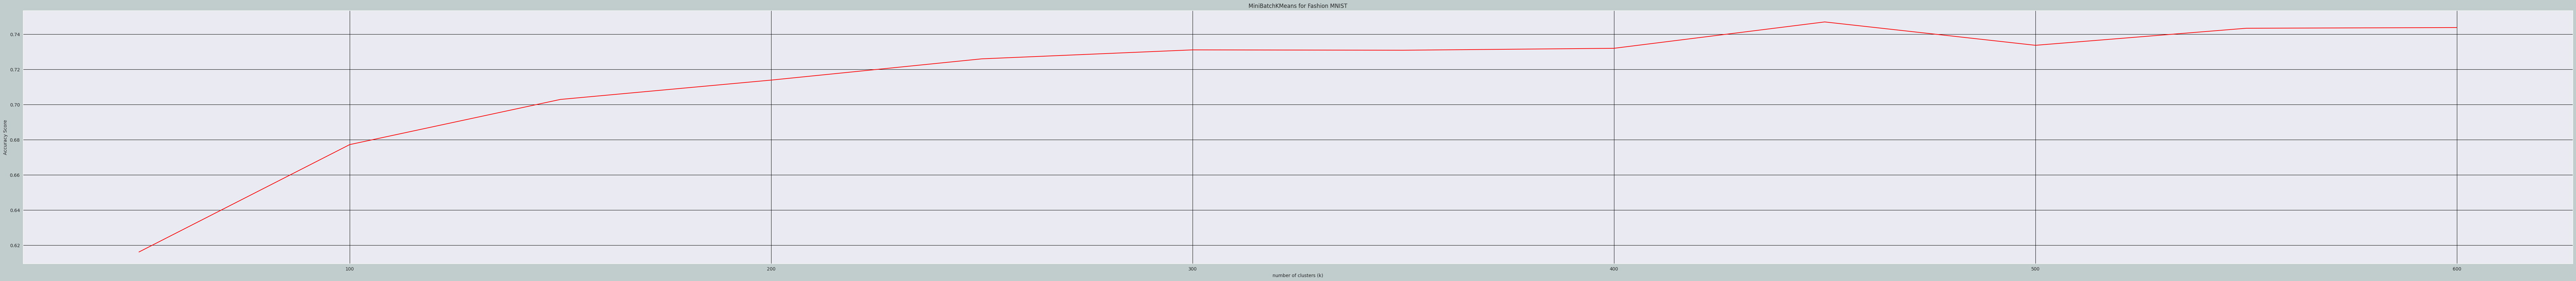

In [16]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("MiniBatchKMeans for Fashion MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

#### Using Logistic Regression

In [17]:
acc = []

In [18]:
count = 0
for k in value_k:
    print("When k = ",k)
    
    # labelling based on clusters
    y_train = y_logreg[count]
    count=count+1
    
    # Initialize logistic regression model
    logistic_reg = LogisticRegression(random_state=0)

    # Train the model
    logistic_reg.fit(X_train_flat, y_train)

    # Predictions on the testing set
    y_pred = logistic_reg.predict(X_test_flat)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

When k =  50


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6515
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.81      0.71      1000
           1       0.96      0.86      0.91      1000
           2       0.46      0.74      0.56      1000
           3       0.80      0.62      0.70      1000
           4       0.46      0.22      0.30      1000
           5       1.00      0.12      0.21      1000
           6       0.43      0.44      0.43      1000
           7       0.60      0.90      0.72      1000
           8       0.94      0.85      0.90      1000
           9       0.68      0.95      0.79      1000

    accuracy                           0.65     10000
   macro avg       0.70      0.65      0.62     10000
weighted avg       0.70      0.65      0.62     10000

When k =  100


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7051
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.99      0.90      0.94      1000
           2       0.56      0.57      0.57      1000
           3       0.81      0.78      0.79      1000
           4       0.56      0.26      0.36      1000
           5       0.99      0.51      0.67      1000
           6       0.33      0.54      0.41      1000
           7       0.70      0.90      0.79      1000
           8       0.92      0.90      0.91      1000
           9       0.79      0.95      0.86      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.70     10000
weighted avg       0.74      0.71      0.70     10000

When k =  150


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7238
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.85      0.75      1000
           1       0.99      0.92      0.95      1000
           2       0.62      0.59      0.60      1000
           3       0.84      0.73      0.78      1000
           4       0.54      0.32      0.40      1000
           5       0.98      0.59      0.74      1000
           6       0.35      0.48      0.40      1000
           7       0.75      0.88      0.81      1000
           8       0.93      0.93      0.93      1000
           9       0.79      0.95      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.74      0.72      0.72     10000
weighted avg       0.74      0.72      0.72     10000

When k =  200


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7606
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75      1000
           1       0.98      0.91      0.94      1000
           2       0.63      0.66      0.64      1000
           3       0.79      0.82      0.80      1000
           4       0.64      0.64      0.64      1000
           5       0.98      0.59      0.74      1000
           6       0.50      0.39      0.44      1000
           7       0.76      0.88      0.82      1000
           8       0.92      0.93      0.92      1000
           9       0.77      0.96      0.86      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000

When k =  250


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.733
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.76      1000
           1       0.99      0.92      0.95      1000
           2       0.59      0.64      0.62      1000
           3       0.80      0.80      0.80      1000
           4       0.61      0.37      0.46      1000
           5       0.99      0.54      0.69      1000
           6       0.39      0.51      0.44      1000
           7       0.74      0.88      0.80      1000
           8       0.93      0.93      0.93      1000
           9       0.76      0.96      0.85      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000

When k =  300


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7448
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.98      0.93      0.95      1000
           2       0.57      0.70      0.63      1000
           3       0.84      0.78      0.81      1000
           4       0.56      0.55      0.55      1000
           5       0.99      0.54      0.70      1000
           6       0.49      0.42      0.45      1000
           7       0.75      0.84      0.79      1000
           8       0.93      0.92      0.93      1000
           9       0.73      0.98      0.84      1000

    accuracy                           0.74     10000
   macro avg       0.76      0.74      0.74     10000
weighted avg       0.76      0.74      0.74     10000

When k =  350


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7637
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      1000
           1       0.99      0.92      0.95      1000
           2       0.62      0.72      0.67      1000
           3       0.86      0.80      0.83      1000
           4       0.63      0.64      0.63      1000
           5       0.99      0.58      0.73      1000
           6       0.49      0.42      0.45      1000
           7       0.77      0.89      0.82      1000
           8       0.94      0.92      0.93      1000
           9       0.77      0.96      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.76      0.76     10000

When k =  400


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7672
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.77      1000
           1       0.99      0.93      0.96      1000
           2       0.63      0.69      0.66      1000
           3       0.86      0.76      0.80      1000
           4       0.62      0.71      0.66      1000
           5       0.99      0.56      0.72      1000
           6       0.51      0.42      0.46      1000
           7       0.76      0.90      0.83      1000
           8       0.93      0.93      0.93      1000
           9       0.77      0.96      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.76     10000

When k =  450


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7693
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      1000
           1       0.99      0.92      0.95      1000
           2       0.64      0.69      0.67      1000
           3       0.85      0.76      0.81      1000
           4       0.62      0.65      0.63      1000
           5       0.99      0.61      0.76      1000
           6       0.49      0.48      0.48      1000
           7       0.78      0.94      0.85      1000
           8       0.94      0.92      0.93      1000
           9       0.79      0.93      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

When k =  500


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7672
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      1000
           1       0.99      0.93      0.96      1000
           2       0.63      0.73      0.68      1000
           3       0.85      0.80      0.82      1000
           4       0.65      0.60      0.63      1000
           5       0.99      0.55      0.71      1000
           6       0.49      0.48      0.48      1000
           7       0.77      0.92      0.84      1000
           8       0.93      0.93      0.93      1000
           9       0.77      0.96      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.76     10000
weighted avg       0.78      0.77      0.76     10000

When k =  550


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7751
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.78      0.77      1000
           1       0.99      0.93      0.96      1000
           2       0.61      0.73      0.66      1000
           3       0.87      0.77      0.82      1000
           4       0.64      0.65      0.64      1000
           5       0.99      0.63      0.77      1000
           6       0.50      0.47      0.48      1000
           7       0.77      0.94      0.85      1000
           8       0.93      0.92      0.93      1000
           9       0.81      0.93      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000

When k =  600
Accuracy: 0.7719
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.78      1000
           1       0.99      0.92   

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


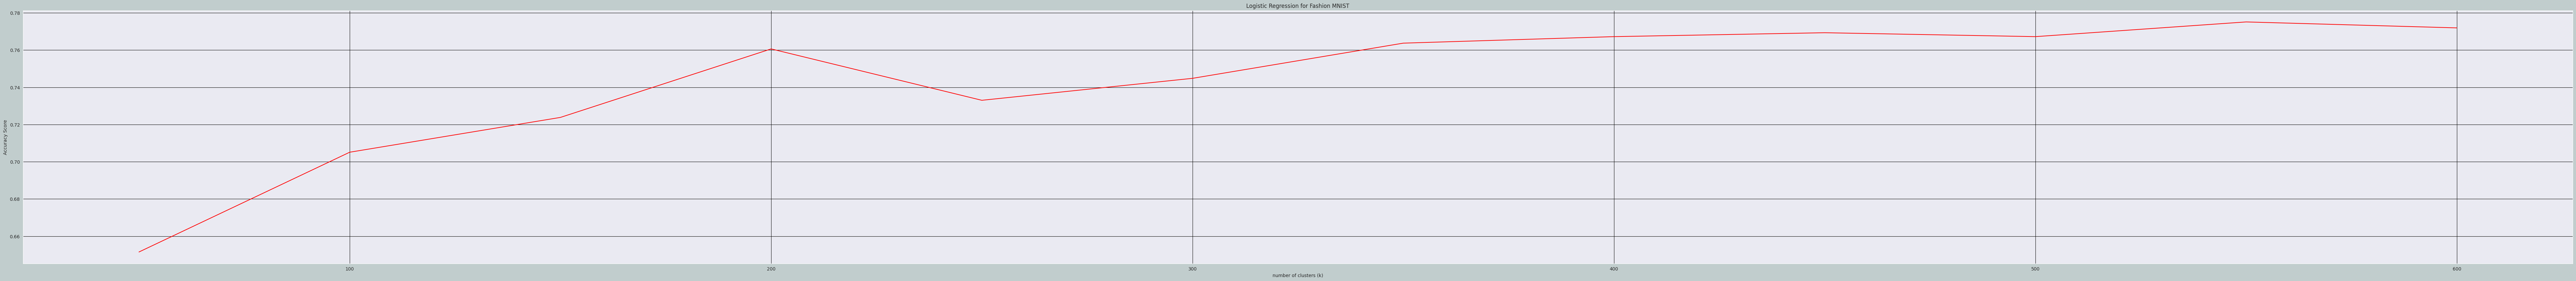

In [19]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression for Fashion MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

#### Modified Logistic Regression

In [20]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [21]:
acc = []

In [22]:
count = 0
for k in value_k:
    print("When k = ",k)

    # labelling based on clusters
    y_train = y_logreg[count]
    count=count+1
    
    # Initialize the logistic regression model for multinomial classification
    model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

When k =  50
Accuracy: 0.6361
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      1000
           1       0.93      0.86      0.89      1000
           2       0.44      0.66      0.53      1000
           3       0.78      0.58      0.67      1000
           4       0.48      0.21      0.29      1000
           5       0.99      0.12      0.22      1000
           6       0.37      0.48      0.41      1000
           7       0.59      0.89      0.71      1000
           8       0.94      0.83      0.88      1000
           9       0.69      0.95      0.80      1000

    accuracy                           0.64     10000
   macro avg       0.69      0.64      0.61     10000
weighted avg       0.69      0.64      0.61     10000

When k =  100
Accuracy: 0.7012
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1000
           1       0.98  

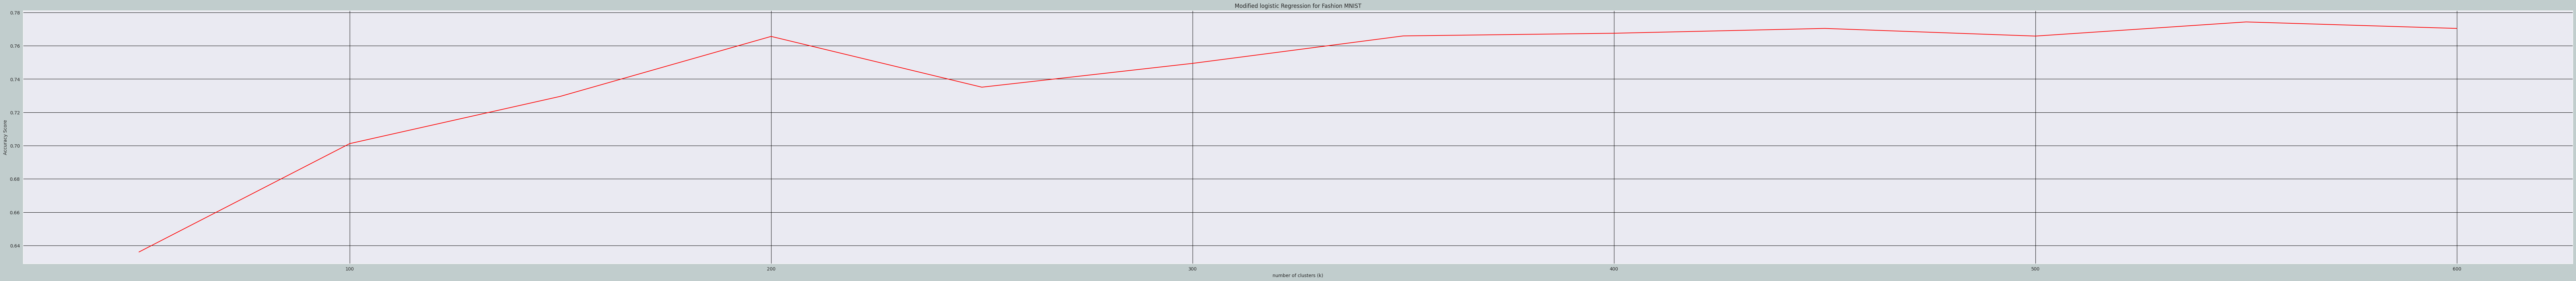

In [23]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("Modified logistic Regression for Fashion MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

## Overhead MNIST

In [24]:
class_names = ['car','harbor','helicopter','oil_gas_field','parking_lot','plane','runway_mark','ship','stadium','storage_tank']

In [25]:
## Preparing the Overhead MNIST training data

# File path
path = '../input/overheadmnist/overhead/'
path_tr = path + 'training/'

# Save files as dataframes
train = pd.read_csv(path + 'train.csv')
labels = pd.read_csv(path + 'labels.csv')
tr_labels = labels[labels['dataset'] == 'train'].drop('dataset', axis = 1)[['image', 'class', 'label']]
ts_labels = labels[labels['dataset'] == 'test'].drop('dataset', axis = 1)[['image', 'class', 'label']]
classes = pd.read_csv(path + 'classes.csv')

# Create master DF to export 
master_tr = tr_labels.join(train.drop('label', axis = 1))
master_ts = ts_labels.join(train.drop('label', axis = 1))

# Save master DFs for future notebooks
master_tr.to_csv('master_tr.csv')
master_ts.to_csv('master_ts.csv')

# Reference lists
clss_lst = classes['class'].values

# Store useful values
tot_pics = len(train)
num_classes = len(classes)
results_dict = {}

In [26]:
# Normalize arrays
X_train_flat = train.drop('label', axis = 1)

y_train = train['label']

In [27]:
## Preparing the Overhead MNIST training data

# File path
path = '../input/overheadmnist/overhead/'
path_tr = path + 'testing/'

# Save files as dataframes
test = pd.read_csv(path + 'train.csv')
labels = pd.read_csv(path + 'labels.csv')
tr_labels = labels[labels['dataset'] == 'train'].drop('dataset', axis = 1)[['image', 'class', 'label']]
ts_labels = labels[labels['dataset'] == 'test'].drop('dataset', axis = 1)[['image', 'class', 'label']]
classes = pd.read_csv(path + 'classes.csv')

# Create master DF to export 
master_tr = tr_labels.join(train.drop('label', axis = 1))
master_ts = ts_labels.join(train.drop('label', axis = 1))

# Save master DFs for future notebooks
master_tr.to_csv('master_tr.csv')
master_ts.to_csv('master_ts.csv')

# Reference lists
clss_lst = classes['class'].values

# Store useful values
tot_pics = len(train)
num_classes = len(classes)
results_dict = {}

In [28]:
# Normalize arrays
X_test_flat = test.drop('label', axis = 1)

y_test = test['label']

In [29]:
X_train_flat.shape, y_train.shape, X_test_flat.shape, y_test.shape

((8519, 784), (8519,), (8519, 784), (8519,))

In [30]:
# Reshape the flattened array back to its original shape
plot_img = np.array(X_train_flat).reshape((X_train_flat.shape[0],28,28))

In [31]:
X_train_flat = np.array(X_train_flat)
X_test_flat = np.array(X_test_flat)

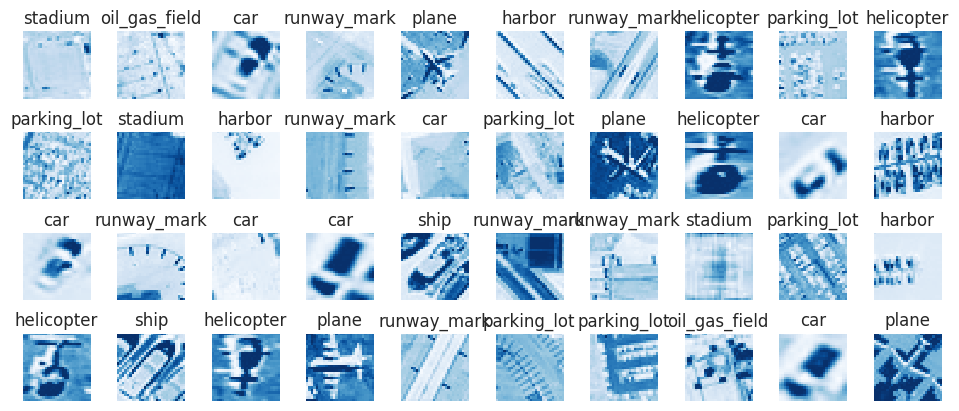

In [32]:
n_rows = 4 # Define the number of rows
n_cols = 10 # Define the number of columns
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2)) # Set the figure size
# Plot the images
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(plot_img[index], cmap="Blues", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### Using KMeans

In [33]:
acc = []

In [34]:
# for labels of logistic regression later used
y_logreg = []

In [35]:
# loop over the number of clusters
for k in value_k:
    print("k = ",k)
    kmeans = KMeans(k, random_state=42, n_init = 3) # Initialize the KMeans model
    
    dist = kmeans.fit_transform(X_train_flat) # Fit the model to the training data and transform the data
    print("dist: ", dist)
    print("dist.shape: ", dist.shape)
    
    
    # Initialize an empty list to store indices
    index_list = []

    # Iterate over each centroid
    for j in range(dist.shape[1]):
        m = np.inf
        index = -1
        for i in range(X_train_flat.shape[0]):
            if dist[i][j]<m:
                index = i
                m = dist[i][j]
        index_list.append(index)

    print(index_list,len(index_list))
    
    
    # Initialize an empty list to store predicted labels
    predicted_labels = []

    for i in range(X_test_flat.shape[0]):
        m = np.inf
        index = -1
        for j in range(k):
            l = np.linalg.norm(X_train_flat[index_list[j]] - X_test_flat[i])
            if(l<m):
                index = index_list[j]
                m = l

        predicted_labels.append(y_train[index])
        
              
    # Calculate accuracy
    accuracy = accuracy_score(predicted_labels, y_test)
    print("Accuracy:", accuracy)
    acc.append(accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(predicted_labels, y_test))
          
          
    ## storing the predicted list on train data for logistic regression later

    # Initialize an empty list to store indices
    index_list = []

    # Iterate over each centroid
    for j in range(dist.shape[1]):
        m = np.inf
        index = -1
        for i in range(X_train_flat.shape[0]):
            if dist[i][j]<m:
                index = i
                m = dist[i][j]
        index_list.append(index)

    print("index list for centroids: ", index_list,len(index_list))

    # Initialize an empty list to store predicted labels
    predicted_labels = []

    for i in range(X_train_flat.shape[0]):
        m = np.inf
        index = -1
        for j in range(k):
            l = np.linalg.norm(X_train_flat[index_list[j]] - X_train_flat[i])
            if(l<m):
                index = index_list[j]
                m = l

        predicted_labels.append(y_train[index])

    y_logreg.append(predicted_labels)

k =  50
dist:  [[1377.0833207   997.06996301  903.24262352 ... 1302.424245
  1577.61648461 1276.43061901]
 [ 950.88817442 1948.8762071  2133.84427536 ... 1329.73628896
  2108.220379   1871.538862  ]
 [2147.02643443 1643.66460964 2006.97179412 ... 1817.52881729
  2032.70458356 1956.17107504]
 ...
 [2889.25411798 3253.05015877 3278.51770284 ... 2756.24700373
  3536.06564664 3117.71862114]
 [2311.71043394 1846.14967412 2153.37190569 ... 1993.36312436
  2260.37828352 2200.29010458]
 [1959.5486412  2766.52733542 3048.3618232  ... 2174.37009671
  2719.74247607 2644.90242046]]
dist.shape:  (8519, 50)
[5113, 5398, 8247, 4605, 5329, 5329, 7143, 7123, 8247, 3991, 978, 1644, 2942, 7124, 799, 6899, 4839, 5032, 1845, 6650, 720, 1608, 5322, 134, 5500, 5056, 5885, 5189, 2797, 2013, 5329, 430, 8457, 1342, 7409, 109, 3065, 7438, 100, 4592, 7307, 6435, 4726, 7307, 6618, 4887, 6547, 2541, 6429, 2154] 50
Accuracy: 0.2278436436201432
Classification Report:
              precision    recall  f1-score   supp

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


index list for centroids:  [5113, 5398, 8247, 4605, 5329, 5329, 7143, 7123, 8247, 3991, 978, 1644, 2942, 7124, 799, 6899, 4839, 5032, 1845, 6650, 720, 1608, 5322, 134, 5500, 5056, 5885, 5189, 2797, 2013, 5329, 430, 8457, 1342, 7409, 109, 3065, 7438, 100, 4592, 7307, 6435, 4726, 7307, 6618, 4887, 6547, 2541, 6429, 2154] 50
k =  100
dist:  [[1627.97297536 1581.47421945  649.89667036 ... 3008.75356252
  2537.66315592 1206.04824505]
 [1862.73163992  976.28523428 1653.13917521 ... 2577.91349739
  1418.59542689 2192.16397625]
 [1913.88540792 1944.79604487 1887.46788566 ... 3121.88132382
  2735.28922402 1898.22162562]
 ...
 [3256.62203601 2693.86848052 3038.00398926 ... 3133.87108861
  2999.51635599 3466.37189783]
 [2013.30872161 2279.87515991 2113.10943215 ... 3413.31671545
  3155.22677239 2026.22161815]
 [2510.35917765 1788.43564991 2650.25043772 ... 3085.5145438
  1043.05740707 2962.55245949]]
dist.shape:  (8519, 100)
[8464, 4592, 3361, 7264, 4196, 1173, 5322, 1312, 4656, 7520, 7630, 6183,

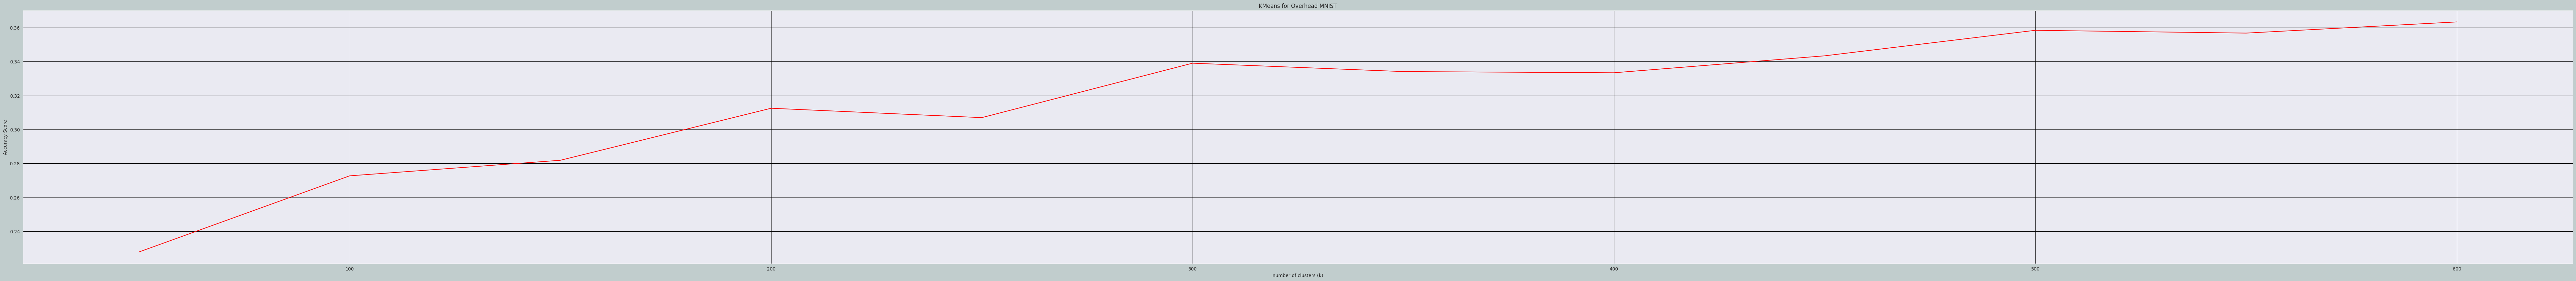

In [36]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("KMeans for Overhead MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

#### Using MiniBatchKMeans

In [37]:
acc = []

In [38]:
# loop over the number of clusters
for k in value_k:
    print("When k = ",k)
    kmeans = MiniBatchKMeans(k, batch_size = 1000, random_state=42) # Initialize the MiniBatchKMeans model
    dist = kmeans.fit_transform(X_train_flat) # Fit the model to the training data and transform the data
    print("dist: ", dist)
    print("dist.shape: ", dist.shape)
    
    
    # Initialize an empty list to store indices
    index_list = []

    # Iterate over each centroid
    for j in range(dist.shape[1]):
        m = np.inf
        index = -1
        for i in range(X_train_flat.shape[0]):
            if dist[i][j]<m:
                index = i
                m = dist[i][j]
        index_list.append(index)

    print("index list for centroids: ", index_list,len(index_list))
    
    
    # Initialize an empty list to store predicted labels
    predicted_labels = []

    for i in range(X_test_flat.shape[0]):
        m = np.inf
        index = -1
        for j in range(k):
            l = np.linalg.norm(X_train_flat[index_list[j]] - X_test_flat[i])
            if(l<m):
                index = index_list[j]
                m = l

        predicted_labels.append(y_train[index])
        
              
    # Calculate accuracy
    accuracy = accuracy_score(predicted_labels, y_test)
    acc.append(accuracy)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(predicted_labels, y_test))

When k =  50


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[ 871.84322675  923.22062925 1757.26690876 ... 2700.36454707
  1033.9774614  3038.18541988]
 [2126.78192503 1885.53484514  975.87056303 ... 1740.52002835
  1346.32584155 1751.15538048]
 [2042.26242929 2047.54254812 2398.7912935  ... 2890.49917522
  1958.32650906 2947.20108092]
 ...
 [3300.4754465  3281.78928345 2718.08284298 ... 3190.85925569
  2834.07773306 3021.8849287 ]
 [2209.57215188 2330.83775759 2692.40560113 ... 3060.52230248
  1998.51250483 3219.77354471]
 [3059.45018929 2844.50365571 1904.52387782 ... 2139.65673496
  2356.18107785 1803.61447283]]
dist.shape:  (8519, 50)
index list for centroids:  [2245, 5713, 5255, 6606, 7307, 2961, 6429, 3684, 6183, 6435, 5056, 5255, 5112, 325, 6547, 4592, 6213, 8298, 814, 2455, 4656, 8485, 2013, 6596, 288, 3557, 8464, 2541, 2195, 3502, 3, 2450, 5885, 8448, 4498, 1162, 1608, 844, 6794, 5361, 8212, 4216, 1312, 4996, 4367, 3185, 2797, 7511, 6600, 3813] 50
Accuracy: 0.2161051766639277
Classification Report:
              precision    re

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: T

dist:  [[3481.42593341  877.85672296 1012.57016108 ... 3935.83269461
  2316.19019081 1547.35753941]
 [2032.1805609  1025.84661179 1064.60312594 ... 2612.33707626
  1391.89331488 1845.26214633]
 [3508.86151219 1805.23088058 1848.12478161 ... 3942.5027584
  2742.22902034 1989.31518722]
 ...
 [3305.79779346 2770.62188618 2754.30683158 ... 3577.6018504
  2891.36144403 3103.85265227]
 [3852.13675709 2119.35561458 2127.1350919  ... 4276.71860192
  3004.38080143 2334.08063392]
 [2017.78003519 2114.8247152  2045.80479907 ... 2636.43679993
  1998.91145377 2550.45840656]]
dist.shape:  (8519, 100)
index list for centroids:  [5885, 810, 1628, 8449, 6771, 6314, 4766, 6618, 4532, 88, 2013, 100, 7881, 4216, 7409, 6442, 5032, 978, 5707, 7307, 4887, 844, 3797, 6350, 7143, 3338, 4533, 7264, 2460, 6511, 3684, 8457, 1302, 4246, 2373, 2232, 6902, 4316, 7307, 2916, 7143, 6372, 4020, 3502, 2509, 5622, 1595, 7307, 6059, 8236, 1002, 7379, 5680, 4129, 3502, 5361, 4271, 2103, 5713, 6754, 637, 1164, 1342, 8229, 1

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[1377.71325642 1218.96887359 1966.44969871 ...  986.26808564
  1359.91606744 1654.6286934 ]
 [2227.00587949 1195.02724661  874.59089939 ... 1505.32308092
  1832.12147327 1476.39396598]
 [1938.88013105 2054.70902798 2226.45534212 ... 1767.72104768
  1940.82566311 1877.2497376 ]
 ...
 [3358.25312315 2940.33318392 2785.09600764 ... 3003.82651933
  2928.4345128  3076.87391313]
 [1637.33395603 2223.10926631 2502.706553   ... 2054.76840028
  2154.9760962  2322.21224701]
 [3014.0567371  2175.85163297 1532.71379649 ... 2370.15731143
  2582.35256487 2086.34288003]]
dist.shape:  (8519, 150)
index list for centroids:  [5591, 4532, 7307, 6163, 6775, 7295, 5056, 3376, 2942, 1637, 6606, 1312, 6341, 8229, 1338, 3530, 7232, 1354, 799, 1202, 2172, 1085, 7813, 7124, 6435, 4887, 3808, 371, 126, 1395, 8040, 5717, 5322, 3755, 1214, 1101, 1173, 7256, 8033, 7695, 2561, 5142, 844, 4800, 6459, 4656, 5381, 7916, 2916, 6109, 7143, 5016, 4592, 5032, 4656, 3058, 7307, 1608, 6458, 321, 5749, 109, 1342, 1581

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[1107.23276596 1429.15485035  996.85602782 ... 1229.03652992
  2659.93854477 1056.76786182]
 [1765.15513872 2789.90940128 1082.70318123 ... 1129.26375204
  1931.7285586  2365.75432236]
 [2186.05793613 2502.71720494 1929.18134137 ... 1944.97137876
  2752.33849609 2220.88108526]
 ...
 [3220.34710473 3788.69498352 2909.44876252 ... 2862.28001001
  3355.42123384 3495.111188  ]
 [2480.49747424 2508.93713629 2226.49079741 ... 2333.58287316
  2935.59875881 2344.47489315]
 [2689.56425997 3671.99657265 2150.67389121 ... 2149.26178429
  2209.0634318  3283.01691679]]
dist.shape:  (8519, 200)
index list for centroids:  [2154, 3185, 90, 7720, 5353, 4537, 5616, 4782, 8485, 3432, 246, 8488, 303, 3577, 6594, 1230, 2580, 7916, 5255, 6021, 882, 7545, 3464, 2013, 2123, 5531, 430, 7307, 4887, 5717, 7846, 3502, 3820, 4419, 6564, 3808, 3120, 815, 4354, 1287, 1612, 4939, 799, 2541, 4035, 6266, 2373, 7307, 1611, 6391, 6750, 3557, 6741, 5292, 100, 547, 6600, 1608, 4019, 3502, 6183, 750, 6786, 1098, 640

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[2684.97328859 2106.33252815 1282.62068221 ... 1326.8047378
  2317.75430104 1458.31038999]
 [1568.61264122 1654.79365994 2199.60843939 ... 1651.76757072
  1761.56209087 2776.49316411]
 [2865.75909843 2363.19672471 1797.23977655 ... 1923.26135024
  2395.91777822 2495.62298124]
 ...
 [3104.65591334 3256.58342401 3276.3216134  ... 2798.09941071
  3067.88379832 3759.10193891]
 [3152.98274416 2496.61394535 2038.4318409  ... 2243.83172547
  2871.02734226 2601.95193479]
 [1814.73150866 2070.61106079 2917.62201649 ... 2458.6907119
  2227.43507201 3641.19559858]]
dist.shape:  (8519, 250)
index list for centroids:  [3397, 8175, 2173, 1657, 844, 95, 7959, 7916, 507, 4805, 5531, 7504, 7302, 637, 3374, 6109, 1581, 5113, 4354, 4199, 2316, 5427, 4780, 2367, 7124, 1652, 2708, 4561, 1318, 4346, 6341, 5991, 5195, 4996, 7084, 799, 2460, 620, 1005, 2927, 1793, 5687, 6748, 4216, 5461, 3664, 2195, 6429, 1354, 26, 213, 7630, 3235, 7744, 5717, 7264, 8212, 7973, 3156, 2541, 8002, 3752, 347, 1219, 131, 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[1377.85879356 3238.33825244 1331.09766734 ... 1877.90787846
   600.15531076 1715.70222987]
 [1678.7132885  1950.66840895 1450.10999583 ... 2541.51647644
  1533.00739276  891.9559735 ]
 [2393.20568589 3086.257606   1990.0281405  ... 2409.31338767
  1860.04409917 2125.16244891]
 ...
 [3019.89614143 3093.91900876 2863.1627617  ... 3596.56919856
  2955.66020754 2544.39769002]
 [2526.88587099 3392.42460549 2327.247301   ... 2484.74566103
  2113.21710244 2530.30587568]
 [2598.32177665 1964.00851704 2416.59450467 ... 3291.98936815
  2541.65312893 1804.59428455]]
dist.shape:  (8519, 300)
index list for centroids:  [6480, 6180, 8283, 6708, 144, 5113, 977, 3817, 8154, 7972, 4939, 6996, 6039, 227, 7034, 4592, 6359, 4407, 850, 5975, 6899, 1819, 5329, 413, 5342, 2123, 1432, 5212, 1143, 486, 6705, 3991, 4742, 2013, 7928, 8333, 6775, 6146, 7956, 3796, 3502, 6878, 5707, 3630, 544, 7307, 8028, 7552, 996, 815, 4019, 3058, 3271, 6618, 1202, 7316, 687, 5862, 1630, 1356, 6947, 368, 5531, 3591, 485

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[ 823.72331445 2014.0029051   856.99814828 ...  865.77298053
  2088.94793491 1727.02023795]
 [1559.01268218 1614.27272734 1062.13722809 ... 1926.9398229
  1981.59586692  782.3801033 ]
 [1912.08937172 2067.15667258 1815.29775437 ... 2114.35888396
  2360.26945479 2022.48882867]
 ...
 [2959.56233418 3260.66735289 2738.22203518 ... 3229.8905539
  3538.34273384 2656.30204003]
 [2044.19769344 2453.88449175 2158.52431989 ... 2342.87328242
  2509.16005321 2361.14015306]
 [2567.72590457 2127.68970942 2142.52802522 ... 2909.08110128
  2442.01774838 1605.5873875 ]]
dist.shape:  (8519, 350)
index list for centroids:  [1237, 5944, 1255, 7379, 4876, 1608, 6404, 5322, 8298, 371, 799, 3991, 100, 814, 7759, 1892, 3820, 4578, 8033, 5032, 361, 857, 7842, 5653, 4127, 6372, 323, 5104, 1914, 8153, 103, 6618, 5184, 1219, 6701, 1429, 3030, 5827, 5381, 6612, 5080, 5560, 2797, 8244, 2032, 6560, 764, 3681, 3201, 53, 535, 1567, 6220, 6618, 8416, 810, 3295, 6692, 2852, 1511, 2892, 6268, 8485, 6865, 5526, 4

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[3802.54926288 2565.44616003 2907.81859819 ...  987.81461276
   759.10143022 2004.82611531]
 [2513.18394936 1963.71493179 2628.50052311 ... 1687.1066636
  1193.51328921 1183.8028562 ]
 [3778.63428988 2400.18714548 2893.42530576 ... 2044.37263897
  1811.08567474 2210.63409975]
 ...
 [3622.08758821 3148.13050344 3792.00698839 ... 3084.6379291
  2817.32206918 2946.7258247 ]
 [4116.27538316 3045.86082523 2999.29925149 ... 2288.41490628
  2156.75859576 2518.48962279]
 [2412.88701835 2233.2057675  2878.93365676 ... 2663.67328625
  2267.29888112 1844.93943814]]
dist.shape:  (8519, 400)
index list for centroids:  [2289, 733, 4711, 7148, 5717, 3184, 5665, 2195, 6655, 5307, 1202, 8166, 3858, 7679, 8002, 5749, 5255, 7823, 4206, 5487, 5262, 1559, 4442, 2574, 1328, 1463, 7504, 2013, 1429, 6109, 8417, 167, 3217, 5423, 844, 6429, 4123, 3159, 2003, 5783, 6183, 626, 947, 4237, 4745, 1081, 6754, 544, 8247, 7788, 7415, 4537, 4800, 4656, 486, 5588, 944, 6719, 1230, 4020, 6059, 2144, 1653, 7293, 11

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[ 938.64134146 1148.9640416  2656.87372366 ... 3581.37696983
  3944.14273433  896.24302828]
 [1021.15425492 1224.08972271 1573.47839864 ... 2356.47215133
  2700.73600132 2147.15288392]
 [1834.10011574 1592.12367474 2869.97977928 ... 3691.70800579
  3804.30145346 2060.53520486]
 ...
 [2755.10951811 2864.78519583 3096.78684421 ... 3503.12531891
  3814.88085119 3297.49660498]
 [2150.41874762 2042.70457682 3158.8581099  ... 4072.43268821
  4133.50923415 2255.33568152]
 [2095.68928229 2086.1112349  1914.68137584 ... 2499.38452424
  2598.63998061 3078.1474243 ]]
dist.shape:  (8519, 450)
index list for centroids:  [4483, 6651, 7338, 2843, 5548, 1354, 5905, 6320, 3610, 1143, 2366, 6606, 3978, 7124, 7379, 471, 3982, 4246, 5533, 1814, 5479, 3397, 7376, 810, 3671, 3502, 6695, 857, 3171, 7210, 3043, 100, 2004, 5976, 3561, 71, 4980, 6824, 7290, 7264, 944, 1155, 6365, 5376, 6963, 5502, 3058, 6021, 8496, 7381, 7783, 3837, 1219, 7153, 4592, 3096, 4816, 7508, 6102, 6429, 2233, 1230, 213, 3430, 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[2851.78137087 1062.09714181 2940.25235333 ... 1697.33941305
   920.7894873  2248.664083  ]
 [1705.40908909 2359.28207092 1790.78765345 ... 1714.84046487
  2149.74640423 1628.77471168]
 [2997.74690542 2220.52985115 3241.13805078 ... 2518.99390504
  2066.58440878 2430.90300428]
 ...
 [2989.29743605 3458.55304784 3154.77447297 ... 3197.59930161
  3301.78643571 3142.79898315]
 [3262.98471466 2327.87554764 3279.18295116 ... 2238.98404567
  2198.05142942 2807.03064271]
 [1918.79574673 3278.73023267 2109.79764988 ... 2486.4317974
  3073.42465116 2169.95023656]]
dist.shape:  (8519, 500)
index list for centroids:  [3671, 844, 2196, 6467, 7661, 2478, 7612, 2748, 7504, 5322, 1655, 2981, 1675, 620, 5032, 4887, 6065, 6615, 213, 3058, 4305, 3752, 6238, 1306, 7817, 5665, 1475, 2961, 8002, 4060, 8048, 2154, 4241, 3235, 535, 2697, 6856, 7090, 3663, 7316, 2099, 3957, 1538, 3757, 104, 3073, 3591, 5680, 1354, 2942, 6949, 2843, 8457, 4623, 6803, 7088, 3123, 1164, 1641, 7952, 3502, 13, 1428, 8106, 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[2852.9386218   772.97964381 1155.21080327 ... 1088.12143514
  3413.37193989 2949.21652451]
 [1786.12978259 1759.14792375 2432.44403841 ... 1233.96628152
  2162.84719756 1829.5083457 ]
 [2994.22047306 1973.92366069 2269.73720946 ... 1927.67662027
  3592.07836774 3053.21649504]
 ...
 [3373.71653244 3151.08453989 3504.6160988  ... 2924.30643954
  3251.90805528 3077.06697682]
 [3303.38319742 2119.01276171 2329.97446338 ... 2178.38121808
  3703.15068556 3254.00319407]
 [1972.71489623 2735.22519206 3355.30207284 ... 2276.26451722
  2265.41475231 1964.12023232]]
dist.shape:  (8519, 550)
index list for centroids:  [2728, 7376, 1123, 6600, 844, 7124, 1819, 3439, 4398, 2640, 6429, 4936, 4875, 3058, 6404, 7437, 7429, 8106, 1597, 3066, 3159, 1230, 134, 8241, 5428, 3380, 5590, 4622, 5104, 69, 5255, 5440, 2556, 2640, 5713, 3540, 4795, 570, 2013, 7170, 6531, 4360, 4062, 5380, 8457, 7018, 1559, 2291, 6600, 6372, 6642, 4838, 1020, 5772, 4512, 1660, 844, 7472, 4917, 5919, 4152, 7816, 5020, 4574

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


dist:  [[ 844.35757046  861.34198198 1560.16976485 ... 3201.70848984
  2844.70472984 2524.42723006]
 [1501.80448354 1806.50914471 1382.76455509 ... 2100.96454133
  2035.7929659  1444.61929322]
 [1932.59679537 2124.64465968 2026.34249122 ... 3357.66472104
  2987.68974293 2765.98297895]
 ...
 [2938.68973753 3172.94564335 2985.8568046  ... 3472.26739738
  3363.00237883 2995.25208077]
 [2216.70236465 2247.70591459 1798.87039421 ... 3579.65038501
  3040.30623458 3032.76064871]
 [2485.33314023 2780.71810431 2173.95789424 ... 2241.55933535
  2549.3091221  1769.86289083]]
dist.shape:  (8519, 600)
index list for centroids:  [4948, 7376, 1150, 5707, 3612, 7124, 7802, 6750, 4592, 1689, 8247, 8078, 5717, 1158, 5273, 911, 6447, 3043, 7660, 3844, 3159, 1230, 8252, 7296, 5747, 1851, 7950, 4726, 5255, 7676, 5255, 6798, 6531, 3077, 4670, 1537, 978, 1697, 2013, 7170, 2541, 2434, 8376, 287, 5413, 8358, 1559, 5975, 3414, 7877, 2369, 2129, 6041, 4342, 6429, 3847, 5827, 2615, 1782, 5434, 4850, 4747, 5416, 7

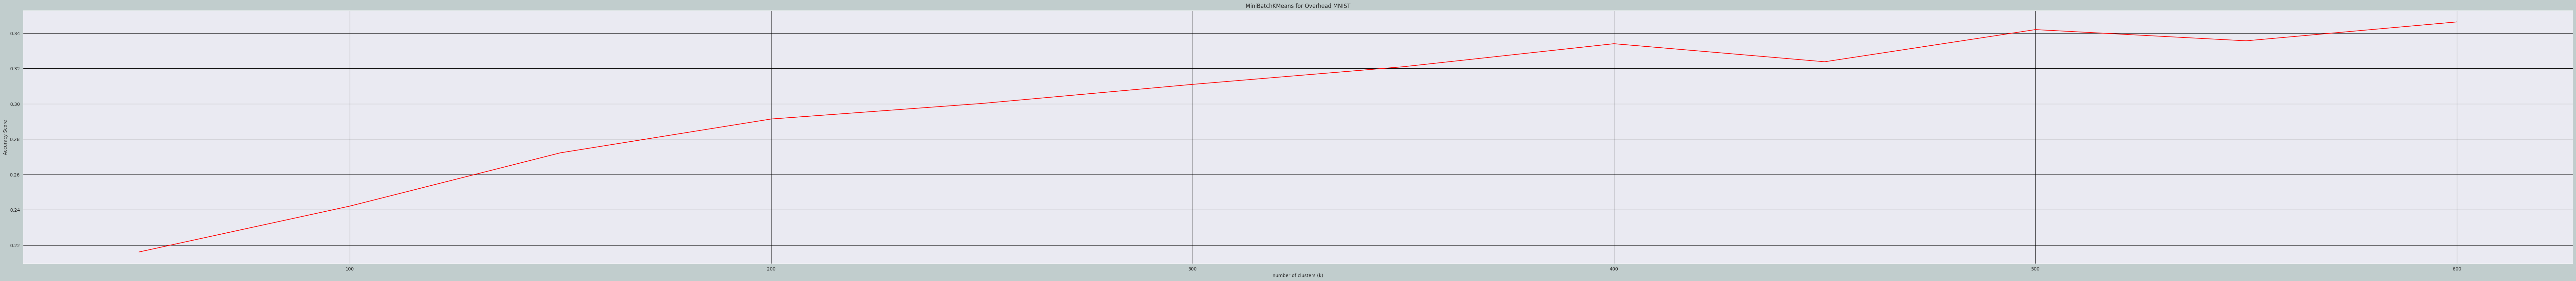

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("MiniBatchKMeans for Overhead MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

#### Using Logistic Regression

In [40]:
acc = []

In [41]:
count = 0
for k in value_k:
    print("When k = ",k)
    
    # labelling based on clusters
    y_train = y_logreg[count]
    count=count+1
    
    # Initialize logistic regression model
    logistic_reg = LogisticRegression(random_state=0)

    # Train the model
    logistic_reg.fit(X_train_flat, y_train)

    # Predictions on the testing set
    y_pred = logistic_reg.predict(X_test_flat)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

When k =  50


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Accuracy: 0.20624486442070666
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.24      0.38       888
           1       0.00      0.00      0.00       889
           2       0.67      0.51      0.58       655
           3       0.71      0.06      0.11       888
           4       0.08      0.02      0.04       888
           5       0.99      0.19      0.32       889
           6       0.01      0.01      0.01       801
           7       0.00      0.00      0.00       889
           8       0.12      0.97      0.22       843
           9       0.69      0.16      0.26       889

    accuracy                           0.21      8519
   macro avg       0.41      0.22      0.19      8519
weighted avg       0.41      0.21      0.18      8519

When k =  100


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.23570841648080762
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.39      0.53       888
           1       1.00      0.00      0.00       889
           2       0.60      0.58      0.59       655
           3       0.34      0.10      0.16       888
           4       0.09      0.04      0.05       888
           5       0.97      0.21      0.35       889
           6       0.02      0.01      0.01       801
           7       0.88      0.01      0.02       889
           8       0.13      0.91      0.23       843
           9       0.61      0.21      0.31       889

    accuracy                           0.24      8519
   macro avg       0.55      0.25      0.23      8519
weighted avg       0.56      0.24      0.22      8519

When k =  150


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.25988965841061157
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.47      0.60       888
           1       0.61      0.02      0.04       889
           2       0.60      0.61      0.60       655
           3       0.62      0.09      0.16       888
           4       0.05      0.01      0.02       888
           5       0.94      0.31      0.47       889
           6       0.03      0.02      0.03       801
           7       0.92      0.02      0.05       889
           8       0.14      0.93      0.24       843
           9       0.62      0.21      0.31       889

    accuracy                           0.26      8519
   macro avg       0.54      0.27      0.25      8519
weighted avg       0.54      0.26      0.24      8519

When k =  200


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.27585397347106466
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.55      0.65       888
           1       0.46      0.02      0.04       889
           2       0.62      0.62      0.62       655
           3       0.46      0.09      0.16       888
           4       0.11      0.02      0.03       888
           5       0.93      0.33      0.49       889
           6       0.01      0.01      0.01       801
           7       0.95      0.06      0.12       889
           8       0.14      0.95      0.24       843
           9       0.67      0.21      0.31       889

    accuracy                           0.28      8519
   macro avg       0.51      0.29      0.27      8519
weighted avg       0.52      0.28      0.26      8519

When k =  250


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.27996243690574013
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.52      0.64       888
           1       1.00      0.00      0.00       889
           2       0.64      0.63      0.63       655
           3       0.60      0.07      0.13       888
           4       0.08      0.02      0.04       888
           5       0.95      0.38      0.54       889
           6       0.02      0.01      0.02       801
           7       0.89      0.08      0.14       889
           8       0.14      0.94      0.24       843
           9       0.60      0.25      0.35       889

    accuracy                           0.28      8519
   macro avg       0.58      0.29      0.27      8519
weighted avg       0.58      0.28      0.27      8519

When k =  300


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.2867707477403451
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.52      0.64       888
           1       0.67      0.03      0.05       889
           2       0.62      0.62      0.62       655
           3       0.46      0.12      0.19       888
           4       0.09      0.02      0.03       888
           5       0.95      0.39      0.56       889
           6       0.02      0.01      0.02       801
           7       0.97      0.09      0.16       889
           8       0.14      0.92      0.24       843
           9       0.61      0.24      0.35       889

    accuracy                           0.29      8519
   macro avg       0.53      0.30      0.29      8519
weighted avg       0.54      0.29      0.28      8519

When k =  350


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.29287475055757717
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.53      0.64       888
           1       0.67      0.03      0.06       889
           2       0.70      0.65      0.68       655
           3       0.46      0.11      0.18       888
           4       0.08      0.03      0.04       888
           5       0.92      0.38      0.54       889
           6       0.02      0.01      0.01       801
           7       0.89      0.11      0.20       889
           8       0.14      0.93      0.25       843
           9       0.66      0.24      0.35       889

    accuracy                           0.29      8519
   macro avg       0.54      0.30      0.30      8519
weighted avg       0.54      0.29      0.29      8519

When k =  400


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.30085690808780374
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.55      0.65       888
           1       1.00      0.01      0.02       889
           2       0.75      0.63      0.68       655
           3       0.60      0.12      0.20       888
           4       0.10      0.02      0.04       888
           5       0.93      0.40      0.56       889
           6       0.02      0.01      0.01       801
           7       0.92      0.14      0.24       889
           8       0.14      0.96      0.25       843
           9       0.64      0.26      0.37       889

    accuracy                           0.30      8519
   macro avg       0.59      0.31      0.30      8519
weighted avg       0.59      0.30      0.29      8519

When k =  450


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.3035567554877333
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67       888
           1       0.94      0.02      0.03       889
           2       0.64      0.67      0.65       655
           3       0.58      0.11      0.18       888
           4       0.07      0.02      0.03       888
           5       0.94      0.40      0.56       889
           6       0.02      0.01      0.01       801
           7       0.93      0.16      0.28       889
           8       0.15      0.95      0.25       843
           9       0.58      0.23      0.33       889

    accuracy                           0.30      8519
   macro avg       0.56      0.31      0.30      8519
weighted avg       0.57      0.30      0.29      8519

When k =  500


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.30977814297452755
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.66       888
           1       0.69      0.03      0.07       889
           2       0.58      0.65      0.61       655
           3       0.53      0.09      0.16       888
           4       0.07      0.01      0.02       888
           5       0.94      0.42      0.58       889
           6       0.02      0.01      0.01       801
           7       0.87      0.23      0.36       889
           8       0.14      0.93      0.25       843
           9       0.60      0.27      0.37       889

    accuracy                           0.31      8519
   macro avg       0.53      0.32      0.31      8519
weighted avg       0.53      0.31      0.30      8519

When k =  550


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.3064913722267872
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.55      0.65       888
           1       0.94      0.02      0.04       889
           2       0.62      0.66      0.64       655
           3       0.61      0.10      0.18       888
           4       0.05      0.01      0.02       888
           5       0.95      0.40      0.57       889
           6       0.02      0.01      0.01       801
           7       0.91      0.22      0.35       889
           8       0.14      0.94      0.25       843
           9       0.60      0.25      0.35       889

    accuracy                           0.31      8519
   macro avg       0.57      0.32      0.31      8519
weighted avg       0.57      0.31      0.30      8519

When k =  600
Accuracy: 0.3226904566263646
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.56      0.67       888
           1

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


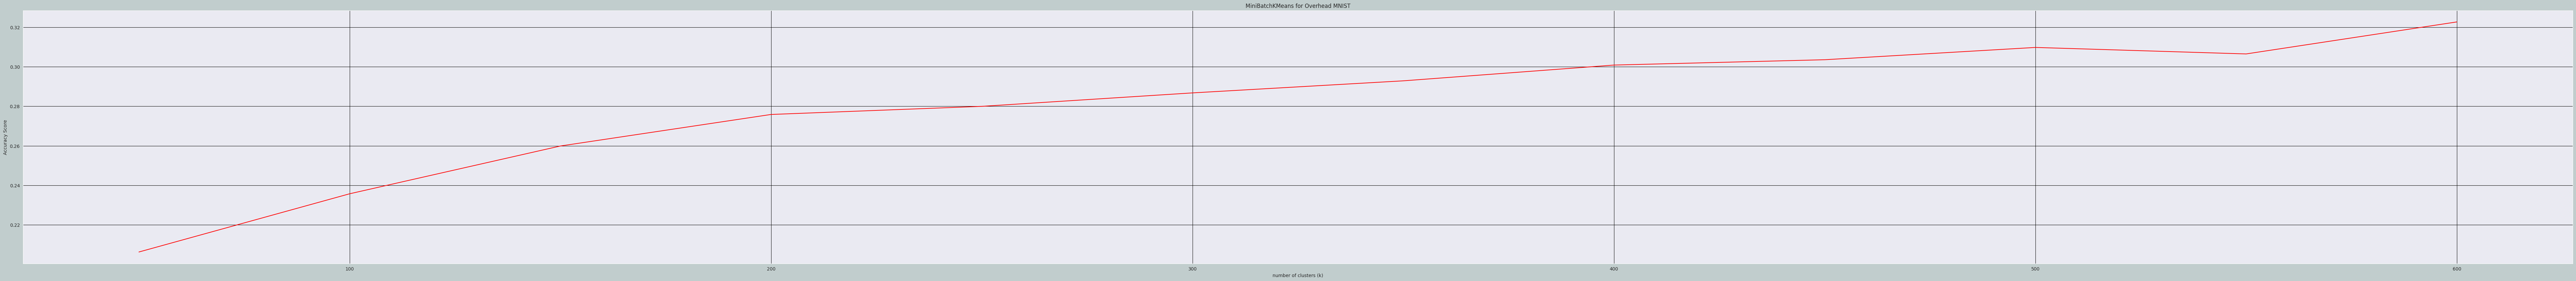

In [42]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("MiniBatchKMeans for Overhead MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()

#### Modified Logistic Regression



In [43]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [44]:
acc = []

In [45]:
count = 0
for k in value_k:
    print("When k = ",k)

    # labelling based on clusters
    y_train = y_logreg[count]
    count=count+1
    
    # Initialize the logistic regression model for multinomial classification
    model = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000, random_state=42)

    # Fit the model to the training data
    model.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    print("Accuracy:", accuracy)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

When k =  50


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. 

Accuracy: 0.24498180537621786
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.35      0.47       888
           1       0.00      0.00      0.00       889
           2       0.57      0.67      0.62       655
           3       0.71      0.05      0.10       888
           4       0.07      0.07      0.07       888
           5       0.87      0.25      0.39       889
           6       0.04      0.03      0.04       801
           7       0.00      0.00      0.00       889
           8       0.15      0.91      0.26       843
           9       0.64      0.24      0.35       889

    accuracy                           0.24      8519
   macro avg       0.37      0.26      0.23      8519
weighted avg       0.37      0.24      0.22      8519

When k =  100


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.28536213170559926
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.51      0.58       888
           1       1.00      0.00      0.00       889
           2       0.57      0.71      0.63       655
           3       0.49      0.24      0.33       888
           4       0.08      0.09      0.08       888
           5       0.89      0.27      0.42       889
           6       0.04      0.03      0.04       801
           7       1.00      0.01      0.02       889
           8       0.16      0.79      0.26       843
           9       0.62      0.31      0.41       889

    accuracy                           0.29      8519
   macro avg       0.55      0.30      0.28      8519
weighted avg       0.56      0.29      0.27      8519

When k =  150


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.28829674844465314
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.58      0.62       888
           1       0.63      0.01      0.03       889
           2       0.47      0.78      0.58       655
           3       0.64      0.06      0.11       888
           4       0.06      0.03      0.04       888
           5       0.87      0.40      0.55       889
           6       0.06      0.09      0.07       801
           7       0.85      0.03      0.05       889
           8       0.16      0.72      0.26       843
           9       0.67      0.32      0.43       889

    accuracy                           0.29      8519
   macro avg       0.51      0.30      0.27      8519
weighted avg       0.51      0.29      0.27      8519

When k =  200


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.325272919356732
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       888
           1       0.76      0.02      0.04       889
           2       0.50      0.78      0.61       655
           3       0.49      0.17      0.25       888
           4       0.11      0.06      0.07       888
           5       0.92      0.42      0.58       889
           6       0.03      0.02      0.02       801
           7       0.94      0.08      0.14       889
           8       0.17      0.87      0.28       843
           9       0.68      0.31      0.42       889

    accuracy                           0.33      8519
   macro avg       0.52      0.34      0.31      8519
weighted avg       0.53      0.33      0.30      8519

When k =  250


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.31423876041788945
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.60      0.64       888
           1       0.67      0.00      0.00       889
           2       0.59      0.73      0.65       655
           3       0.74      0.07      0.13       888
           4       0.09      0.08      0.08       888
           5       0.89      0.45      0.60       889
           6       0.03      0.02      0.03       801
           7       0.82      0.08      0.15       889
           8       0.17      0.88      0.28       843
           9       0.64      0.33      0.43       889

    accuracy                           0.31      8519
   macro avg       0.53      0.33      0.30      8519
weighted avg       0.54      0.31      0.29      8519

When k =  300


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.3438196971475525
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       888
           1       0.64      0.04      0.07       889
           2       0.55      0.76      0.64       655
           3       0.58      0.24      0.34       888
           4       0.10      0.06      0.08       888
           5       0.88      0.46      0.61       889
           6       0.03      0.03      0.03       801
           7       0.86      0.13      0.22       889
           8       0.17      0.82      0.28       843
           9       0.65      0.35      0.46       889

    accuracy                           0.34      8519
   macro avg       0.52      0.35      0.34      8519
weighted avg       0.52      0.34      0.33      8519

When k =  350


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.33795046366944476
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       888
           1       0.77      0.03      0.06       889
           2       0.64      0.72      0.68       655
           3       0.59      0.17      0.27       888
           4       0.09      0.08      0.08       888
           5       0.89      0.44      0.59       889
           6       0.04      0.03      0.04       801
           7       0.83      0.16      0.27       889
           8       0.17      0.88      0.29       843
           9       0.66      0.33      0.44       889

    accuracy                           0.34      8519
   macro avg       0.54      0.35      0.34      8519
weighted avg       0.54      0.34      0.33      8519

When k =  400


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.3478107759126658
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       888
           1       0.80      0.01      0.03       889
           2       0.68      0.71      0.70       655
           3       0.77      0.16      0.26       888
           4       0.09      0.07      0.08       888
           5       0.88      0.47      0.62       889
           6       0.03      0.02      0.03       801
           7       0.85      0.22      0.34       889
           8       0.17      0.89      0.29       843
           9       0.70      0.39      0.50       889

    accuracy                           0.35      8519
   macro avg       0.56      0.36      0.35      8519
weighted avg       0.57      0.35      0.34      8519

When k =  450


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.34299800446061746
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.63      0.65       888
           1       0.70      0.02      0.04       889
           2       0.55      0.77      0.64       655
           3       0.70      0.11      0.19       888
           4       0.10      0.06      0.08       888
           5       0.90      0.47      0.62       889
           6       0.04      0.02      0.03       801
           7       0.83      0.24      0.37       889
           8       0.17      0.88      0.29       843
           9       0.59      0.32      0.42       889

    accuracy                           0.34      8519
   macro avg       0.52      0.35      0.33      8519
weighted avg       0.53      0.34      0.33      8519

When k =  500


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.35931447352975704
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       888
           1       0.70      0.02      0.05       889
           2       0.50      0.81      0.62       655
           3       0.59      0.15      0.24       888
           4       0.06      0.02      0.03       888
           5       0.90      0.45      0.60       889
           6       0.03      0.02      0.03       801
           7       0.84      0.34      0.49       889
           8       0.18      0.87      0.29       843
           9       0.61      0.37      0.46       889

    accuracy                           0.36      8519
   macro avg       0.51      0.37      0.35      8519
weighted avg       0.52      0.36      0.34      8519

When k =  550


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.3572015494776382
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       888
           1       0.71      0.02      0.04       889
           2       0.54      0.78      0.64       655
           3       0.72      0.11      0.19       888
           4       0.09      0.05      0.07       888
           5       0.89      0.48      0.62       889
           6       0.05      0.03      0.04       801
           7       0.86      0.31      0.46       889
           8       0.18      0.89      0.29       843
           9       0.67      0.37      0.48       889

    accuracy                           0.36      8519
   macro avg       0.54      0.37      0.35      8519
weighted avg       0.55      0.36      0.34      8519

When k =  600
Accuracy: 0.36342293696443245
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       888
           1 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


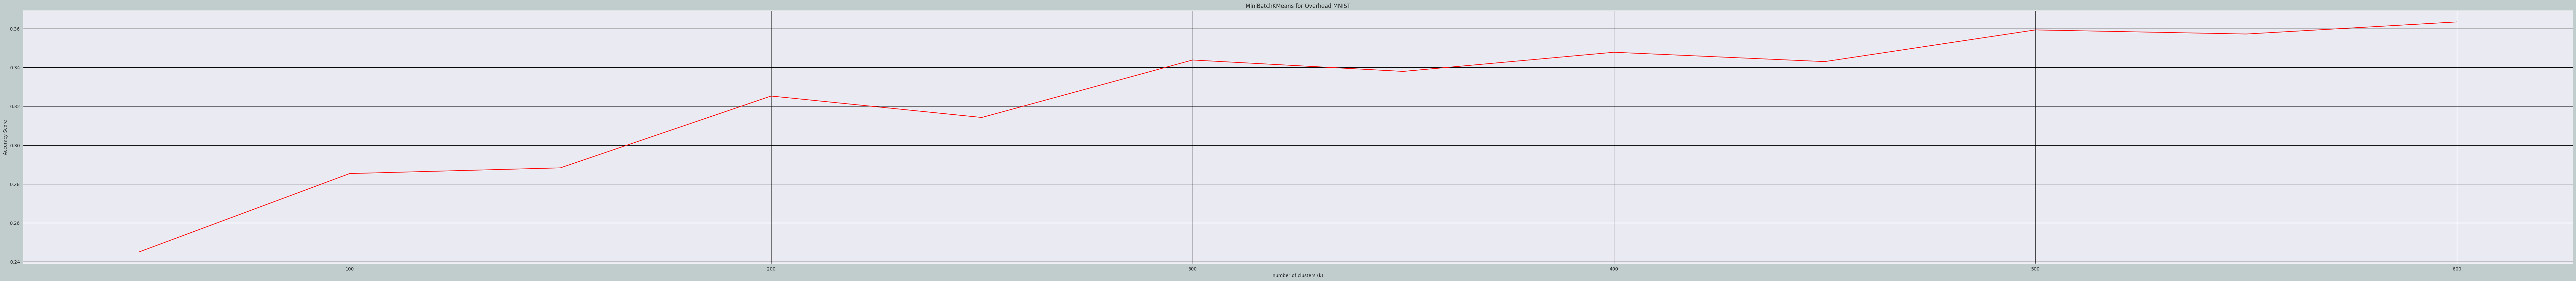

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(100, 10),  facecolor= "#C1CDCD")
plt.xlabel("number of clusters (k)")
plt.ylabel("Accuracy Score")
plt.title("MiniBatchKMeans for Overhead MNIST")
plt.grid(color='black')
plt.plot(value_k, acc, color = 'red')
plt.show()